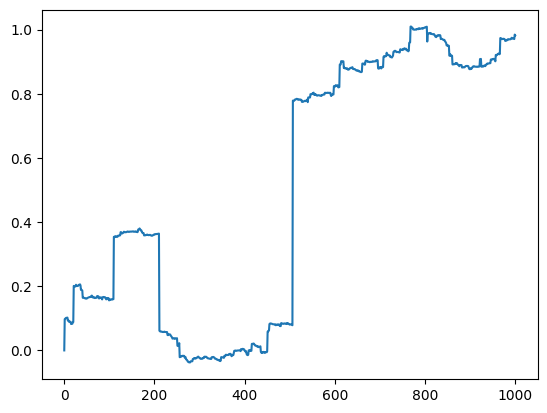

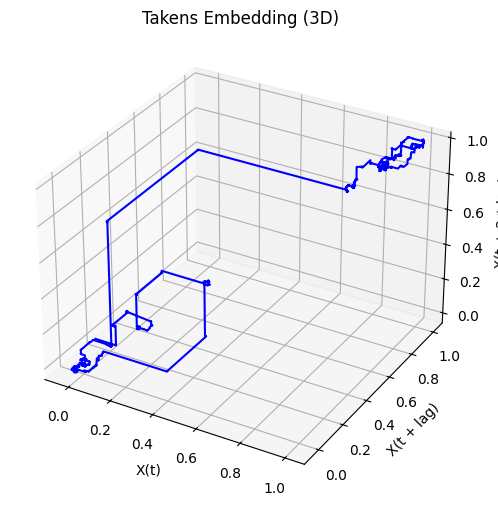

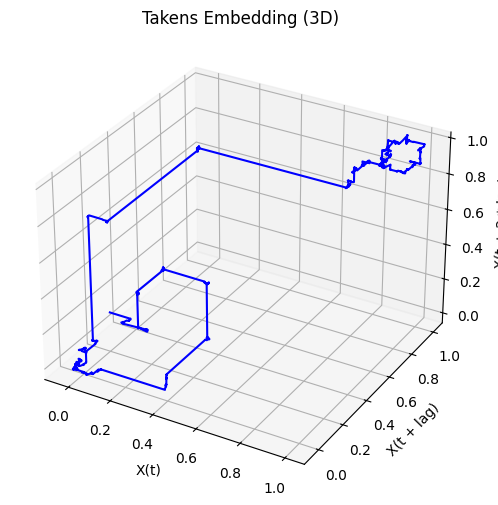

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import time
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt
from stochastic.processes.continuous import FractionalBrownianMotion
import stochastic.processes as sto 

def takens_embedding(time_series, lag, dimension):
    """Compute the Takens embedding for a time series.
    
    Parameters:
    time_series (array-like): The time series data.
    lag (int): The time delay (lag) parameter.
    dimension (int): The embedding dimension.
    
    Returns:
    np.ndarray: The embedded phase space.
    """
    n_points = len(time_series) - (dimension - 1) * lag
    embedded_space = np.empty((n_points, dimension))
    
    for i in range(dimension):
        embedded_space[:, i] = time_series[i * lag : i * lag + n_points]
    
    return embedded_space

def plot_embedding(embedded_space, dimension):
    """Plot the embedded space using Matplotlib.
    
    Parameters:
    embedded_space (np.ndarray): The embedded phase space.
    dimension (int): The embedding dimension.
    """
    if dimension == 1:
        plt.figure(figsize=(8, 6))
        plt.plot(embedded_space[:, 0], 'b')
        plt.xlabel('Time')
        plt.ylabel('Value')
        plt.title('Takens Embedding (1D)')
        plt.show()

    elif dimension == 2:
        plt.figure(figsize=(8, 6))
        plt.plot(embedded_space[:, 0], embedded_space[:, 1], 'b')
        plt.xlabel('X(t)')
        plt.ylabel('X(t + lag)')
        plt.title('Takens Embedding (2D)')
        plt.show()

    elif dimension == 3:
        fig = plt.figure(figsize=(8, 6))
        ax = fig.add_subplot(111, projection='3d')
        ax.plot(embedded_space[:, 0], embedded_space[:, 1], embedded_space[:, 2], 'b')
        ax.set_xlabel('X(t)')
        ax.set_ylabel('X(t + lag)')
        ax.set_zlabel('X(t + 2 * lag)')
        ax.set_title('Takens Embedding (3D)')
        plt.show()
    
    else:
        print("Plotting is only supported for dimensions 1, 2, or 3.")

# Example usage
if __name__ == "__main__":
    # Generate an example time series (e.g., sine wave with noise)
    #fbm =  FractionalBrownianMotion(hurst=0.7, t=1)
    #fbm = sto.CauchyProcess()
    fbm = sto.CauchyProcess()

    s = fbm.sample(1000)
    times = fbm.times(1000)
    plt.plot(s)
    t = np.linspace(0, 10, 1000)

    time_series = s#np.sin(2 * np.pi * t) + 0.1 * np.random.randn(len(t))
    
    lag = 8  # Lag parameter
    dimension = 3  # Embedding dimension

    # Compute the Takens embedding
    embedded_space = takens_embedding(time_series, lag, dimension)

    # Plot the embedding
    plot_embedding(embedded_space, dimension)
    lag = 32  # Lag parameter
    dimension = 3  # Embedding dimension

    # Compute the Takens embedding
    embedded_space = takens_embedding(time_series, lag, dimension)
    plot_embedding(embedded_space, dimension)



(1001,)
(969, 3)


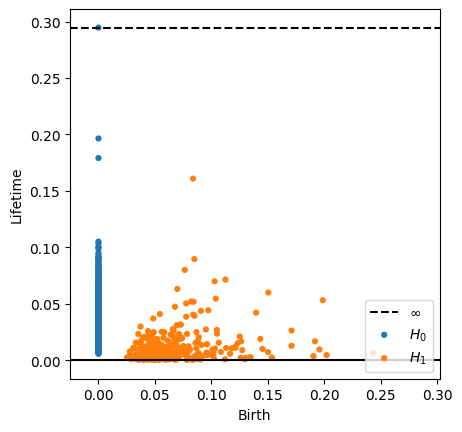

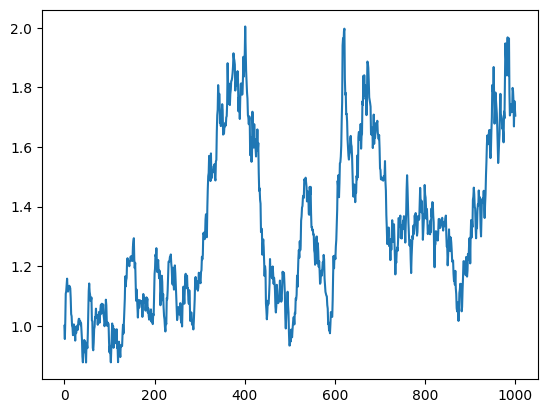

In [9]:
import numpy as np
from ripser import ripser
from persim import plot_diagrams
fbm = sto.GeometricBrownianMotion()
s = fbm.sample(1000)
data = s #np.random.random((100,3))
print(data.shape)
lag = 16  # Lag parameter
dimension = 3  # Embedding dimension

    # Compute the Takens embedding
embedded_space = takens_embedding(data, lag, dimension)
print(embedded_space.shape)

plt.figure("222")

diagrams = ripser(embedded_space)['dgms']
#plot_diagrams(diagrams, show=True)
plot_diagrams(diagrams, lifetime=True)

plt.figure("22")

plt.plot(data)